# **Выполнила: Большова Елизавета Александровна**


### Домашнее задание №1: Построение сложной сцены из облаков точек

In [1]:
import open3d as o3d
import numpy as np
import copy
import plotly.graph_objects as go


def manual_center(pcd):
    current_center = pcd.get_center()
    translation_to_origin = -current_center
    pcd.translate(translation_to_origin)
    return pcd



1. **Создайте несколько геометрических примитивов в Open3D**

   * куб, сферу, цилиндр, конус, тор.
   * Для каждого объекта сгенерируйте облако точек (`sample_points_poisson_disk`, `sample_points_uniformly`).

2. **Примените трансформации**

   * перенесите фигуры в разные части сцены;
   * задайте масштаб (например, сделать одну фигуру большой, другую маленькой);
   * добавьте поворот для нескольких объектов.

3. **Соберите композицию**

   * сложите объекты вместе в одну сцену (`+` для объединения облаков или через `pcd.points.extend`).
   * Создайте композицию:
        * снеговик из сфер
        * стол с ножками
        * пирамида из кубов
        * Шестилучевая звезда из цилиндров или прямоугольников(*)

4. **Визуализация**

   * отобразите полученную сцену в Open3D;
   * опционально — дополнительно визуализируйте в Plotly

5. **Дополнительное задание (по желанию)**

   * раскрасьте разные объекты разными цветами (`pcd.paint_uniform_color`)

In [2]:
# 1 задание. Геометрические примитивы в Open3D
# Куб
mesh_cube = o3d.geometry.TriangleMesh.create_box(width=1.0, height=1.0, depth=1.0)
# Сфера
mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=1.0)
# Цилиндр
mesh_cylinder = o3d.geometry.TriangleMesh.create_cylinder(radius=0.5, height=2.0)
# Конус
mesh_cone = o3d.geometry.TriangleMesh.create_cone(radius=0.5, height=1.0)
# Тор
mesh_torus = o3d.geometry.TriangleMesh.create_torus(torus_radius=1.0, tube_radius=0.3)

# Облака точек через sample_points_uniformly
pcd_cube = mesh_cube.sample_points_uniformly(number_of_points=1000)
pcd_sphere = mesh_sphere.sample_points_uniformly(number_of_points=1000)
pcd_cylinder = mesh_cylinder.sample_points_uniformly(number_of_points=1000)
pcd_cone = mesh_cone.sample_points_uniformly(number_of_points=1000)
pcd_torus = mesh_torus.sample_points_uniformly(number_of_points=1000)

pcd_cube.paint_uniform_color([1.0, 0.0, 0.0])      # Красный
pcd_sphere.paint_uniform_color([0.0, 1.0, 0.0])    # Зеленый
pcd_cylinder.paint_uniform_color([0.0, 0.0, 1.0])  # Синий
pcd_cone.paint_uniform_color([1.0, 1.0, 0.0])      # Желтый
pcd_torus.paint_uniform_color([0.0, 1.0, 1.0])     # Бирюзовый

# В один список для отображения
geometries = [pcd_cube, pcd_sphere, pcd_cylinder, pcd_cone, pcd_torus]
o3d.visualization.draw_geometries(geometries, window_name="Облака точек Uniformly")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [3]:
# 1 задание. Облака точек через sample_points_poisson_disk

pcd_cube_poisson = mesh_cube.sample_points_poisson_disk(number_of_points=1000, init_factor=5)
pcd_sphere_poisson = mesh_sphere.sample_points_poisson_disk(number_of_points=1000, init_factor=5)
pcd_cylinder_poisson = mesh_cylinder.sample_points_poisson_disk(number_of_points=1000, init_factor=5)
pcd_cone_poisson = mesh_cone.sample_points_poisson_disk(number_of_points=1000, init_factor=5)
pcd_torus_poisson = mesh_torus.sample_points_poisson_disk(number_of_points=1000, init_factor=5)

# Те же цвета
pcd_cube_poisson.paint_uniform_color([1.0, 0.0, 0.0])
pcd_sphere_poisson.paint_uniform_color([0.0, 1.0, 0.0])
pcd_cylinder_poisson.paint_uniform_color([0.0, 0.0, 1.0])
pcd_cone_poisson.paint_uniform_color([1.0, 1.0, 0.0])
pcd_torus_poisson.paint_uniform_color([0.0, 1.0, 1.0])

# В один список для отображения
geometries_poisson = [pcd_cube_poisson, pcd_sphere_poisson, pcd_cylinder_poisson, pcd_cone_poisson, pcd_torus_poisson]
o3d.visualization.draw_geometries(geometries_poisson, window_name="Облака точек Poisson Disk")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [4]:
# 2 задание. Трансформации

# Исходные фигуры
pcd_cube = o3d.geometry.TriangleMesh.create_box().sample_points_uniformly(1000).paint_uniform_color([1,0,0])
pcd_sphere = o3d.geometry.TriangleMesh.create_sphere().sample_points_uniformly(1000).paint_uniform_color([0,1,0])
pcd_cylinder = o3d.geometry.TriangleMesh.create_cylinder().sample_points_uniformly(1000).paint_uniform_color([0,0,1])
pcd_cone = o3d.geometry.TriangleMesh.create_cone().sample_points_uniformly(1000).paint_uniform_color([1,1,0])
pcd_torus = o3d.geometry.TriangleMesh.create_torus().sample_points_uniformly(1000).paint_uniform_color([0,1,1])

# Сфера без изменений
sphere_final = copy.deepcopy(pcd_sphere)

# Перенос для куба
cube_final = copy.deepcopy(pcd_cube)
cube_final.translate((-3, 0, 0))

# Масштабирование цилиндра
cylinder_final = copy.deepcopy(pcd_cylinder)
cylinder_final.translate((3, 0, 0)) 
cylinder_final.scale(2.0, center=cylinder_final.get_center()) 

# Поворот конуса на бок
cone_final = copy.deepcopy(pcd_cone)
cone_final.translate((0, -3, 0)) 
rotation_matrix_cone = cone_final.get_rotation_matrix_from_xyz((np.pi / 2, 0, 0))
cone_final.rotate(rotation_matrix_cone, center=cone_final.get_center()) 

# Уменьшение и поворот тора
torus_final = copy.deepcopy(pcd_torus)
torus_final.translate((0, 3, 0)) 
torus_final.scale(0.7, center=torus_final.get_center()) 
rotation_matrix_torus = torus_final.get_rotation_matrix_from_xyz((np.pi / 2, 0, 0))
torus_final.rotate(rotation_matrix_torus, center=torus_final.get_center())

final_showcase_scene = [
    sphere_final,
    cube_final,
    cylinder_final,
    cone_final,
    torus_final
]

o3d.visualization.draw_geometries(
    final_showcase_scene,
    window_name="Демонстрация всех трансформаций"
)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [5]:
# 3 задание. Снеговик
s_bottom_mesh = o3d.geometry.TriangleMesh.create_sphere(radius=1.0)
pcd_s_bottom = s_bottom_mesh.sample_points_uniformly(number_of_points=1500)
pcd_s_bottom.paint_uniform_color([0.9, 0.9, 1.0]) 

s_middle_mesh = o3d.geometry.TriangleMesh.create_sphere(radius=0.7)
pcd_s_middle = s_middle_mesh.sample_points_uniformly(number_of_points=1000)
pcd_s_middle.paint_uniform_color([0.9, 0.9, 1.0])
pcd_s_middle.translate((0, 0, 1.2))

s_top_mesh = o3d.geometry.TriangleMesh.create_sphere(radius=0.4)
pcd_s_top = s_top_mesh.sample_points_uniformly(number_of_points=800)
pcd_s_top.paint_uniform_color([0.9, 0.9, 1.0])
pcd_s_top.translate((0, 0, 1.2 + 0.8))

nose_mesh = o3d.geometry.TriangleMesh.create_cone(radius=0.1, height=0.4)
pcd_nose = nose_mesh.sample_points_uniformly(number_of_points=300)
pcd_nose.paint_uniform_color([1.0, 0.5, 0.0]) 
R = pcd_nose.get_rotation_matrix_from_xyz((-np.pi / 2, 2, 2))
pcd_nose.rotate(R, center=(0, 0, 0))
pcd_nose.translate((0.4, 0, 1.2 + 0.8)) 

snowman = pcd_s_bottom + pcd_s_middle + pcd_s_top + pcd_nose
o3d.visualization.draw_geometries([snowman], window_name="Снеговик")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [6]:
# 3 задание. Стол
table_width, table_height, table_thickness = 3.0, 2.0, 0.2
leg_height, leg_radius, leg_inset = 1.5, 0.1, 0.2

pcd_tabletop = o3d.geometry.TriangleMesh.create_box(
    width=table_width, height=table_height, depth=table_thickness
).sample_points_uniformly(2000)
pcd_tabletop = manual_center(pcd_tabletop) 
pcd_tabletop.translate((0, 0, leg_height + table_thickness / 2))
pcd_tabletop.paint_uniform_color([0.5, 0.3, 0.1])

pcd_leg_template = o3d.geometry.TriangleMesh.create_cylinder(
    radius=leg_radius, height=leg_height
).sample_points_uniformly(500)
pcd_leg_template = manual_center(pcd_leg_template) 
pcd_leg_template.paint_uniform_color([0.4, 0.2, 0.0])

x_pos, y_pos = table_width / 2 - leg_inset, table_height / 2 - leg_inset
leg_final_z = leg_height / 2
pcd_leg1 = copy.deepcopy(pcd_leg_template).translate(( x_pos,  y_pos, leg_final_z))
pcd_leg2 = copy.deepcopy(pcd_leg_template).translate((-x_pos,  y_pos, leg_final_z))
pcd_leg3 = copy.deepcopy(pcd_leg_template).translate(( x_pos, -y_pos, leg_final_z))
pcd_leg4 = copy.deepcopy(pcd_leg_template).translate((-x_pos, -y_pos, leg_final_z))

table = pcd_tabletop + pcd_leg1 + pcd_leg2 + pcd_leg3 + pcd_leg4
o3d.visualization.draw_geometries([table], window_name="Стол")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [7]:
# 3 задание. Пирамида из кубов

cube_size = 1.0
base_cube_mesh = o3d.geometry.TriangleMesh.create_box(width=cube_size, height=cube_size, depth=cube_size)
base_pcd_cube = base_cube_mesh.sample_points_uniformly(500)
base_pcd_cube = manual_center(base_pcd_cube) 
base_pcd_cube.paint_uniform_color([1.0, 0.0, 0.0])

pyramid_cubes = []

z_height_layer1 = cube_size / 2

for i in range(3):
    for j in range(3):
        cube_copy = copy.deepcopy(base_pcd_cube)
        x = (i - 1) * cube_size
        y = (j - 1) * cube_size
        cube_copy.translate((x, y, z_height_layer1))
        pyramid_cubes.append(cube_copy)

z_height_layer2 = cube_size * 1.5
for i in range(2):
    for j in range(2):
        cube_copy = copy.deepcopy(base_pcd_cube)
        x = (i - 0.5) * cube_size
        y = (j - 0.5) * cube_size
        cube_copy.translate((x, y, z_height_layer2))
        pyramid_cubes.append(cube_copy)

z_height_layer3 = cube_size * 2.5
cube_copy = copy.deepcopy(base_pcd_cube)
cube_copy.translate((0, 0, z_height_layer3))
pyramid_cubes.append(cube_copy)

pyramid = o3d.geometry.PointCloud()
for pcd in pyramid_cubes:
    pyramid += pcd

o3d.visualization.draw_geometries([pyramid], window_name="Пирамида из кубов")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [8]:
# 3 задание. Шестилучевая звезда из прямоугольников

beam_mesh = o3d.geometry.TriangleMesh.create_box(width=3, height=0.5, depth=0.5)
pcd_beam = beam_mesh.sample_points_uniformly(1000)
pcd_beam = manual_center(pcd_beam)
pcd_beam.translate((1.5, 0, 0)) 
pcd_beam.paint_uniform_color([0.9, 0.9, 0.0])

star_beams = []
for i in range(6):
    angle_rad = np.deg2rad(i * 60)
    rotation_matrix = pcd_beam.get_rotation_matrix_from_xyz((0, 0, angle_rad))
    star_beams.append(copy.deepcopy(pcd_beam).rotate(rotation_matrix, center=(0, 0, 0)))

star = o3d.geometry.PointCloud()
for pcd in star_beams:
    star += pcd

o3d.visualization.draw_geometries([star], window_name="Шестилучевая звезда из прямоугольников")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [9]:
# 3 задание. Шестилучевая звезда из конусов (ради интереса)

cone_mesh = o3d.geometry.TriangleMesh.create_cone(radius=0.5, height=3.0)
pcd_cone_beam = cone_mesh.sample_points_uniformly(1000)
pcd_cone_beam.paint_uniform_color([0.9, 0.9, 0.0]) 

R_lay_down = pcd_cone_beam.get_rotation_matrix_from_xyz((0, np.pi/2, 0))
pcd_cone_beam.rotate(R_lay_down, center=(0,0,0))

pcd_cone_beam.translate((0, 0, 0)) 

star_beams_cones = []
num_beams = 6
for i in range(num_beams):
    angle_rad = np.deg2rad(i * 360 / num_beams)
    
    rotation_matrix = pcd_cone_beam.get_rotation_matrix_from_xyz((0, 0, angle_rad))
    
    beam_copy = copy.deepcopy(pcd_cone_beam)
    beam_copy.rotate(rotation_matrix, center=(0, 0, 0))
    
    star_beams_cones.append(beam_copy)

star_cones = o3d.geometry.PointCloud()
for pcd in star_beams_cones:
    star_cones += pcd
    
o3d.visualization.draw_geometries([star_cones], window_name="Шестилучевая звезда из конусов")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [10]:
# 4 задание. Итоговая сборка в Open3D

# Все фигуры 
scene_snowman = copy.deepcopy(snowman).translate((-7, 7, 1.0))
scene_table = copy.deepcopy(table).translate((7, 7, 0))
scene_pyramid = copy.deepcopy(pyramid).translate((-7, -7, 0))
scene_star_rect = copy.deepcopy(star).translate((7, -7, 0))
scene_star_cones = copy.deepcopy(star_cones).translate((0, 0, 0))
scene_star_rect.scale(0.5, center=scene_star_rect.get_center())
scene_star_cones.scale(0.5, center=scene_star_cones.get_center())

# Пол для фигур
floor_mesh = o3d.geometry.TriangleMesh.create_box(width=25, height=25, depth=0.1)
pcd_floor = floor_mesh.sample_points_uniformly(10000)
pcd_floor = manual_center(pcd_floor)
pcd_floor.paint_uniform_color([0.5, 0.5, 0.5])

final_scene = (
    scene_snowman +
    scene_table +
    scene_pyramid +
    scene_star_rect +
    scene_star_cones +
    pcd_floor
)

o3d.visualization.draw_geometries([final_scene], window_name="Итоговая работа")

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


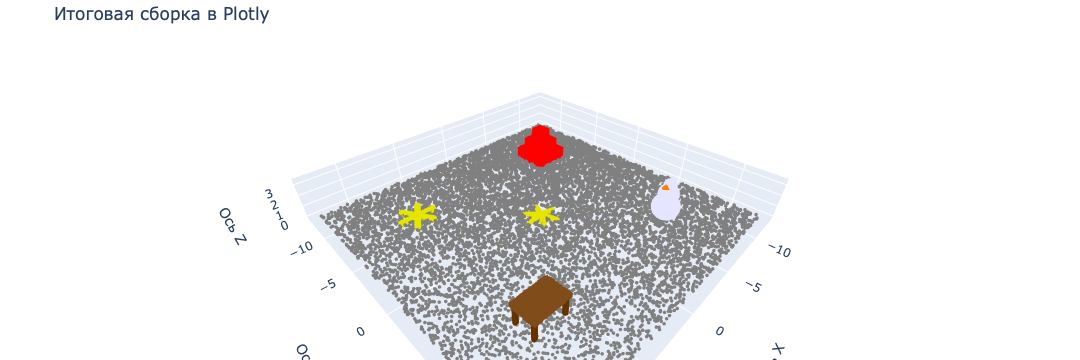

In [11]:
# 4 задание. Итоговая сборка в Plotly

points = np.asarray(final_scene.points)
colors = np.asarray(final_scene.colors)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0],
            y=points[:,1],
            z=points[:,2],
            mode='markers',
            marker=dict(
                size=2,
                color=colors
            )
        )
    ],
    layout=dict(
        title_text="Итоговая сборка в Plotly",
        scene=dict(
            xaxis_title='Ось X',
            yaxis_title='Ось Y',
            zaxis_title='Ось Z',
            aspectmode='data'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
)

fig.show()